In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
from sklearn.datasets import  fetch_openml
mnist = fetch_openml("mnist_784", version=1)

In [42]:
X_df: pd.DataFrame = mnist["data"]
y_s: pd.Series = mnist["target"]

X = X_df.to_numpy()
y = y_s.to_numpy()

y = y.astype(np.uint8)

X_train: np.ndarray = X[:60000]
X_test: np.ndarray = X[60000:]
y_train: np.ndarray = y[:60000]
y_test: np.ndarray = y[60000:]

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


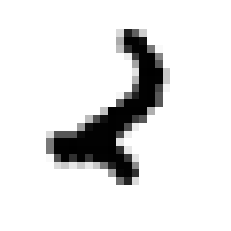

Label for above picture is:  2


In [43]:
random_num = np.random.randint(0, len(X))

example_digit: np.ndarray = X[random_num]
some_digit_image = example_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

print("Label for above picture is: ", y[random_num])

In [44]:
# KNeighboursClassifier is recommended by the book
from sklearn.neighbors import  KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [45]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train, y_train_pred, average="weighted")
print(f"F1 score: {f1 * 100}%")

In [ ]:
%%time

from sklearn.model_selection import GridSearchCV

param_grid = [
    {"weights": ["uniform", "distance"], "n_neighbors": [3, 4, 5]},
]

grid_search = GridSearchCV(knn_clf, param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
grid_search.best_score_

In [ ]:
test_predicts = grid_search.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, test_predicts)